In [2]:
#Importing the Data
import pandas as pd
Review_data=pd.read_csv('NLP_train.csv')

In [4]:
Review_data.shape

(38932, 5)

In [5]:
Review_data.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


In [6]:
Review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [7]:
Review_data.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id21817,"Excellent position, close to subway station, -...",Firefox,Desktop,happy
freq,1,1,7367,15026,26521


# Data Cleaning/EDA

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


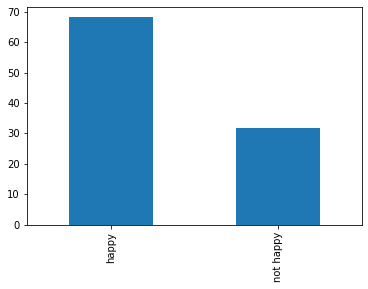

In [9]:
import matplotlib.pyplot as plt
print(round(Review_data.Is_Response.value_counts(normalize=True)*100,2))
round(Review_data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.show()


In [16]:
#Droping the columns
Review_data.drop(columns=['User_ID','Browser_Used','Device_Used'], inplace=True)

In [17]:
import re

In [18]:
import string

In [25]:
#removing  squre brackets, punctuations and numbers
def text_clean_1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*', '',text)
    return text
cleaned1=lambda x: text_clean_1(x)
        

In [27]:
Review_data['cleaned_desciption']=pd.DataFrame(Review_data.Description.apply(cleaned1))
Review_data.head()

,Description,Is_Response,cleaned_desciption
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [33]:
from sklearn.model_selection import train_test_split
Independent_var=Review_data.cleaned_desciption
Dependent_var=Review_data.Is_Response
X_train, X_test, y_train, y_test= train_test_split(Independent_var,Dependent_var,test_size=0.1,random_state=225)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
from sklearn.linear_model import LogisticRegression
tvec=TfidfVectorizer()

In [41]:
clf2=LogisticRegression(solver="lbfgs")

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
model=Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [45]:
prediction=model.predict(X_test)

In [48]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction, y_test)

array([[2421,  297],
       [ 150, 1026]], dtype=int64)